In [1]:
# import symbolic capability to Python
from sympy import *
# print things all pretty
from sympy.abc import *
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
init_printing()

# Exercise

You have a dataset with $m$ binary columns and $n$ rows. A given decision tree has the depth $d$.

## Questions:
1. How many different decision trees with depth $d=1$ are possible for a dataset with $m$ binary columns and $n$ rows?
2. How many different decision trees with depth $d=2$ are possible for a dataset with $m$ binary columns and $n$ rows?
3. How many different decision trees with depth $d=3$ are possible for a dataset with $m$ binary columns and $n$ rows?
4. How many different decision trees with depth $d=4$ are possible for a dataset with $m$ binary columns and $n$ rows?
5. In general, how many different decision trees with depth $d$ are possible for a dataset with $m$ binary columns and $n$ rows?
6. How may different decision trees are possible for $m=4$ and $d=4$?
7. In general, how many different decision trees of any depth are possible for a dataset with $m$ binary columns and $n$ rows?
8. How many decision trees are possible for $m=4$ binary columns?
9. There are $10^{80}$ atoms in the universe. What is the value for $m$ so that the number of decision trees is greater than the number of atoms in the universe?
10. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m$ binary columns and $n$ rows?
11. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m=3$ binary columns and $n=100$ rows?

Variables:
* $n$: number of rows of the data
* $m$: number of binary columns (attributes) of the data
* $d$: depth of the decision tree

In [2]:
m = symbols("m", positive=True, integer=True)
d = symbols("d", positive=True, integer=True)
n = symbols("n", positive=True, integer=True)

## Answers:

### First Idea: 

I assumed that attributes couldn't  be used more than once, since they were binary, so I considered using the factorial to find all possible combinations, following the following Wikipedia formula:

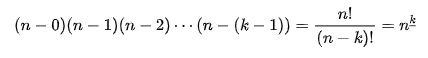

https://en.wikipedia.org/wiki/Factorial

#### Mathematical Formulas: 

To find all possible tree combinations: $\displaystyle \frac{n!}{(n - k)!}$, where **n** is the number of columns and **k** is the tree size.

To find the tree size: $2^{d+1}- 1$, where **d** is the depth.

In [3]:
f_combinations = factorial(m) / factorial(m - (2**(d + 1) - 1))

#### Programming Function:

In [4]:
def find_combinations(m, d):
    size = 2**(d + 1) - 1
    total = m
    for i in range(size - 1):
        total *= m - (i + 1) 
    return total

-----------------

#### 1. How many different decision trees with depth $d=1$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{m!}{(m - (2^{1+1}- 1))!} = \displaystyle \frac{m!}{(m - 3)!}$

#### 2. How many different decision trees with depth $d=2$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{m!}{(m - (2^{2+1}- 1))!} = \displaystyle \frac{m!}{(m - 7)!}$

#### 3. How many different decision trees with depth $d=3$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{m!}{(m - (2^{3+1}- 1))!} = \displaystyle \frac{m!}{(m - 15)!}$

#### 4. How many different decision trees with depth $d=4$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{m!}{(m - (2^{4+1}- 1))!} = \displaystyle \frac{m!}{(m - 31)!}$

#### 5. In general, how many different decision trees with depth $d$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{m!}{(m - (2^{d+1}- 1))!}$

#### 6. How may different decision trees are possible for $m=4$ and $d=4$?

With *m* = 4, being binary columns, it is not possible to have a tree with depth *d* = 4, since we would have a tree with a size of 31 nodes, for which 27 would not be used, since each columns would only be used once in a decision. In this case, the possibilities would simply be 4! for a total of 24 combinations. 

#### 7. In general, how many different decision trees of any depth are possible for a dataset with $m$ binary columns and $n$ rows?

The formula would be: $m!$

#### 8. How many decision trees are possible for $m=4$ binary columns?

$m! = 4! = 24$

#### 9. There are $10^{80}$ atoms in the universe. What is the value for $m$ so that the number of decision trees is greater than the number of atoms in the universe?

In [5]:
f_fact = factorial(m)
f_atoms = 10**80

n_fact = 1
total = 1
while True:
    n_fact += 1
    total *= n_fact
    if total > (10**80):
        print('m = {}'.format(n_fact))
        break
        
print('Is the factorial of 59 greater than 10^80?: {}'.format(factorial(59) > (10**80)))
print('Is the factorial of 58 greater than 10^80?: {}'.format(factorial(58) > (10**80)))

m = 59
Is the factorial of 59 greater than 10^80?: True
Is the factorial of 58 greater than 10^80?: False


#### 10. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m$ binary columns and $n$ rows?

Maybe $m! * n$?

#### 11. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m=3$ binary columns and $n=100$ rows?

$m! * n = 3! * 100 = 600$

--------------------

### Second Idea: 

After doing some more research, I realized that my first approach was wrong and that attributes can be used more than once, according to this website:

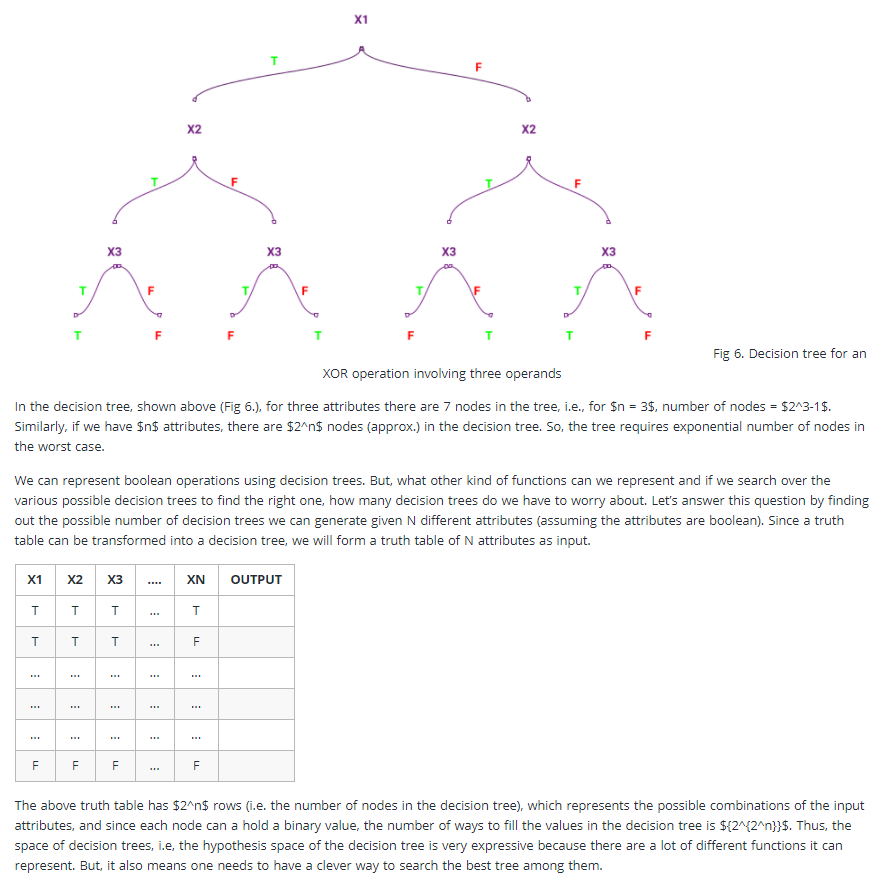
https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

#### Mathematical Forlumas: 

- Size of the tree $s$ given $m, s = 2^m - 1 $
- Size of the tree $s$ given $d, s = 2^{d + 1} - 1$
- All possible combinations $c$, given $s, c = 2^s$

#### Programming Function

In [6]:
def find_combinations(m,d):
    total_size = 2**(2**m - 1)
    limit_size = 2**(2**(d + 1) - 1)
    return total_size / limit_size

#### 1. How many different decision trees with depth $d=1$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{2^{2^m - 1}}{2^{2^{1 + 1} - 1}} = \displaystyle \frac{2^{2^m - 1}}{8}$

#### 2. How many different decision trees with depth $d=2$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{2^{2^m - 1}}{2^{2^{2 + 1} - 1}} = \displaystyle \frac{2^{2^m - 1}}{128}$

#### 3. How many different decision trees with depth $d=3$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{2^{2^m - 1}}{2^{2^{3 + 1} - 1}} = \displaystyle \frac{2^{2^m - 1}}{32768}$

#### 4. How many different decision trees with depth $d=4$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{2^{2^m - 1}}{2^{2^{4 + 1} - 1}} = \displaystyle \frac{2^{2^m - 1}}{2147483648}$

#### 5. In general, how many different decision trees with depth $d$ are possible for a dataset with $m$ binary columns and $n$ rows?

$\displaystyle \frac{2^{2^m - 1}}{2^{2^{d + 1} - 1}}$

#### 6. How may different decision trees are possible for $m=4$ and $d=4$?

With *m* = 4, being binary columns, it is not possible to have a tree with depth *d* = 4. The full tree with $m=4$ would have a size of 15, while a tree with $d=4$ would have a size of 31, where 16 nodes would not be used. In this case, we would have $32768$ different decision trees by using $2^{2^m - 1}$.

#### 7. In general, how many different decision trees of any depth are possible for a dataset with $m$ binary columns and $n$ rows?

The formula would be: $2^{2^m - 1}$

#### 8. How many decision trees are possible for $m=4$ binary columns?

$2^{2^4 - 1} = 32768$

#### 9. There are $10^{80}$ atoms in the universe. What is the value for $m$ so that the number of decision trees is greater than the number of atoms in the universe?

In [7]:
m = 1
while True:
    num_trees = 2**(2**m - 1)
    if num_trees > 10**80:
        print('The value for m is: {}'.format(m))
        break
    m += 1
        
print(2**(2**8 - 1) > (10**80))
print(2**(2**9 - 1) > (10**80))

The value for m is: 9
False
True


#### 10. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m$ binary columns and $n$ rows?

$2^{2^m} * n$

#### 11. How many operations (steps) does the naive testing take of all possible decision trees for a dataset with $m=3$ binary columns and $n=100$ rows?

$2^{2^3} * 100 = 25600$